# **IMPORTING THE REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [5]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
df.shape

(15, 2)

In [22]:
df[["Chirps/Second","Ground Temperature"]].corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


**VISUALIZING THE DATA**

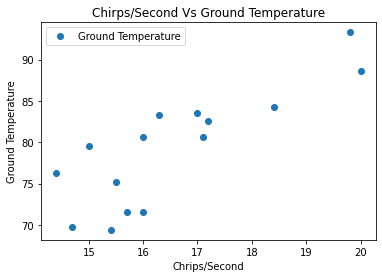

In [6]:
df.plot(x="Chirps/Second",y="Ground Temperature",style="o")
plt.title("Chirps/Second Vs Ground Temperature")
plt.xlabel("Chrips/Second")
plt.ylabel("Ground Temperature")
plt.show()

**APPLYING THE MACHINE LEARNING MODEL TO THE DATASET**

In [7]:
#Since the dataset is small already, we are not going to split it
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
Xval = df[["Ground Temperature"]].values
Yval = df[["Chirps/Second"]].values

In [9]:
linreg.fit(Xval,Yval)

LinearRegression()

In [19]:
coefficient = linreg.coef_
float(coefficient)

0.20299973140771363

In [13]:
Y_pred = linreg.predict(Xval)

**EVALUATING THE PERFORMANCE OF THE MODEL**

In [15]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Yval.reshape(len(Yval),1)),1))

[[18.44509085 20.        ]
 [14.99409541 16.        ]
 [19.39918959 19.8       ]
 [17.572192   18.4       ]
 [16.821093   17.1       ]
 [15.72489445 15.5       ]
 [14.60839592 14.7       ]
 [14.99409541 15.7       ]
 [14.547496   15.4       ]
 [17.36919227 16.3       ]
 [16.61809327 15.        ]
 [17.22709246 17.2       ]
 [16.821093   16.        ]
 [17.40979222 17.        ]
 [15.94819415 14.4       ]]


In [20]:
from sklearn.metrics import r2_score
Accuracy = r2_score(Yval,Y_pred)
print(f"The accuracy of the linear model is {Accuracy*100} % and the coefficient is {float(coefficient)}")

The accuracy of the linear model is 69.22946529146998 % and the coefficient is 0.20299973140771363


**CHIRPING RATE WHEN THE GROUND TEMPERATURE IS 95**

In [24]:
linreg.predict([[95]])

array([[19.74428913]])

**FINDING THE GROUND TEMPERATURE BASED ON CHIRPS/SECOND**

In [31]:
Xval_t = df[["Chirps/Second"]].values
Yval_t = df[["Ground Temperature"]].values

In [32]:
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()
LinearReg.fit(Xval_t,Yval_t)

LinearRegression()

In [34]:
temp = float(LinearReg.predict([[18]]))

In [37]:
print(f"The temperature when the chirping rate is 18 is {temp} ")

The temperature when the chirping rate is 18 is 84.23479629930205 
